# Simulate Active Model B Dynamics

## As described in https://www.nature.com/articles/ncomms5351

### The Equations we solve are as follows:

$\dot{\phi} = \nabla\cdot\mathbf{J}$

$\mathbf{J} = \nabla\mu + \Lambda$

$\mu = -\phi + \phi^3 -\nabla^2\phi + \lambda (\nabla \phi)^2$

where $\Lambda$ is a Gaussian White Noise. 

This set of equations becomes identical to the Cahn Hilliard equation when $\lambda=0$, but a non-zero $\lambda$ breaks the detailed balance in the standard Model B dynamics (see the above referenced paper) 

In [4]:
# Define Simulation Parameters
dt = 0.001
NX, NY = 256, 256
h = 0.5

In [5]:
# Define Field Parameters and Initialize the Field

from numpy.random import rand, randn

lam = -2.0
noise_strength = 0.01
phi0 = -0.4 # This is the initial average value of phi (=2c-1)
phi = phi0 + noise_strength * ( 0.5-rand(NX,NY) )

In [6]:
# Define the PDE operations using the del_operators library

import del_operators as dl

# Set boundary condition to be periodic
dl.set_periodic_bc()

def mu(phi):
    grad_phi = dl.grad(phi)
    # dl.grad has its first dimension as the dimension of the gradient.
    # Hence its shape is (2,NX,NY)
    grad_sq_phi = grad_phi[0]**2 + grad_phi[1]**2   
    return (-phi + phi**3 - dl.lap(phi,h=h) + lam*grad_sq_phi)

def current(phi):
    # Current has the dimension (2,NX,NY), the first dimension being 
    # the vector dimension (X/Y)
    return ( -dl.grad( mu(phi) ) + noise_strength * randn(2,NX,NY) )

def timestep(phi):
    return (phi + dt * ( -dl.div( current(phi) ) ) )


<IPython.core.display.Javascript object>


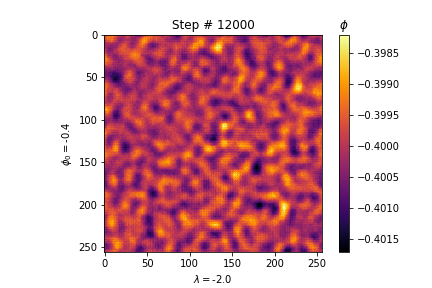

In [ ]:
# Timestep phi and visualize

%matplotlib notebook
import matplotlib.pyplot as plt 
plt.ion()
fig = plt.figure()
steps = 1000000
checkpoint = 100
for step in range(steps):
    if (step%checkpoint==0):
        plt.clf()
        plt.imshow(phi, cmap='inferno')
        clb = plt.colorbar()
        clb.ax.set_title(r'$\phi$')
        plt.xlabel(r"$\lambda = $" + f"{lam}")
        plt.ylabel(r"$\phi_0 = $" + f"{phi0}")
        plt.title(f'Step # {step}')
        fig.canvas.draw()
    phi = timestep(phi)
plt.ioff()
plt.show()